<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Predict the Price of Homes at Sale for a Singapore Public Housing Dataset

## Background

Singapore is a densely populated island city-state that is known for its world-class infrastructure, high standard of living, and booming real estate market. One of the most popular types of housing in Singapore is the Housing and Development Board (HDB) flat, which is a government-subsidized apartment that is affordable for many Singaporeans. In recent years, the resale market for HDB flats has become increasingly competitive, with prices fluctuating based on a variety of factors such as location, age of the flat, and nearby amenities. Linear regression is a statistical modeling technique that can be used to predict HDB resale prices based on these factors, allowing buyers and sellers to make more informed decisions in this dynamic market. By analyzing past sales data and building a linear regression model, it is possible to forecast HDB resale prices with a certain level of accuracy, helping to mitigate risk and uncertainty in the buying and selling process.

## Problem Statement

Housing and Development Board (HDB) resale market in Singapore is a significant contributor to the real estate industry. The HDB resale price is influenced by various factors such as location, age of the property, floor area, lease remaining, and many others. The aim of this project is to develop a linear regression model that predicts the resale price of HDB flats based on these factors.

The dataset contains information about past HDB resale transactions, including the flat type, town, flat model, floor area, lease commencement date, and resale price. The objective is to create a model that accurately predicts the resale price of HDB flats based on the given features.

The evaluation metric for the model will be the Root Mean Square Error (RMSE), which measures the difference between the predicted and actual prices. A lower RMSE indicates better accuracy and precision of the model.

The project's outcome will be a linear regression model that can predict HDB resale prices with minimal errors and high accuracy. The model can assist buyers, sellers, and real estate agents in making informed decisions based on the estimated prices.





## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import chi2, f_regression, SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.pipeline import Pipeline 
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display="diagram")
%matplotlib inline

In [2]:
hdb = pd.read_csv("../data/train.csv")

C:\Users\szehu\AppData\Local\Temp\ipykernel_18832\3363301004.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  hdb = pd.read_csv("../data/train.csv")


## Data Cleaning: Initial Check

##### Standardize column name

In [3]:
# Convert all columns to lowercase and replace spaces in column names.

hdb.columns = hdb.columns.str.lower().str.replace(' ', '_')

##### Overview of dataset

In [4]:
#basic info

hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   tranc_yearmonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  tranc_year                 150634 non-null  int64  
 12  tranc_month                150634 non-null  int64  
 13  mid_storey                 15

In [5]:
#data description

hdb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,150634.0,93047.887496,53679.906247,1.000000,46469.250000,93077.500000,139574.750000,1.859660e+05
floor_area_sqm,150634.0,97.197630,24.403040,31.000000,75.000000,95.000000,112.000000,2.800000e+02
lease_commence_date,150634.0,1992.448464,12.138829,1966.000000,1984.000000,1992.000000,2001.000000,2.019000e+03
resale_price,150634.0,449161.501213,143307.573143,150000.000000,347000.000000,420000.000000,520000.000000,1.258000e+06
tranc_year,150634.0,2016.489551,2.752396,2012.000000,2014.000000,2017.000000,2019.000000,2.021000e+03
tranc_month,150634.0,6.580500,3.345468,1.000000,4.000000,7.000000,9.000000,1.200000e+01
mid_storey,150634.0,8.284823,5.508074,2.000000,5.000000,8.000000,11.000000,5.000000e+01
lower,150634.0,7.248370,5.515155,1.000000,4.000000,7.000000,10.000000,4.900000e+01
upper,150634.0,9.321275,5.507364,3.000000,6.000000,9.000000,12.000000,5.100000e+01
mid,150634.0,8.284823,5.508074,2.000000,5.000000,8.000000,11.000000,5.000000e+01


In [6]:
# get an idea of row and column number

hdb.shape

(150634, 77)

In [7]:
# get an idea of dataset overview

hdb.head(3)

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013


## Data Cleaning: Null Value

In [8]:
#find features with null value

null_features = []
check_null = hdb.isnull().sum().sort_values(ascending=False)
for key,value in check_null.iteritems():
    if value != 0:
        null_features.append(key)
        print(key,":",value)

hawker_within_500m : 97390
mall_within_500m : 92789
hawker_within_1km : 60868
hawker_within_2km : 29202
mall_within_1km : 25426
mall_within_2km : 1940
mall_nearest_distance : 829


In [9]:
#check if there is 0 in the respective features, if not then assume it meant 0

for feature in null_features:
    print(feature, ":", hdb[hdb[feature] == 0].shape[0])

hawker_within_500m : 0
mall_within_500m : 0
hawker_within_1km : 0
hawker_within_2km : 0
mall_within_1km : 0
mall_within_2km : 0
mall_nearest_distance : 30


In [10]:
# fillna with zero for the above 6 features with no "zero value"

null_to_zero_features = null_features[:-1]
for feature in null_to_zero_features:
    hdb[feature] = hdb[feature].fillna(0)

In [11]:
hdb.shape

(150634, 77)

In [12]:
# drop column of mall_nearest_distance
# because 829 are null value
# comparing either to drop 799 row for all columns or to drop a single column, I will drop a single column.

hdb.drop(columns=["mall_nearest_distance"], inplace=True)

In [13]:
# check of null value again

for feature in null_features[:-1]:
    print(feature, ":", hdb[feature].isnull().sum())

hawker_within_500m : 0
mall_within_500m : 0
hawker_within_1km : 0
hawker_within_2km : 0
mall_within_1km : 0
mall_within_2km : 0


In [14]:
# check of shape (should have one column less)

hdb.shape

(150634, 76)

## Data Cleaning: Duplication

In [15]:
#check of duplicate rows

hdb.duplicated().sum()

0

## Data Cleaning: Data Types

##### Datetime Variable

In [16]:
#change to datetime datatype

hdb["tranc_yearmonth"] = pd.to_datetime(hdb["tranc_yearmonth"])

##### Categorical and Continuos Variables

In [17]:
#find datatype "object" for datatype conversion

object_features = []
continuos_features = []
for feature in hdb.columns:
    if hdb[feature].dtypes == "O":
        object_features.append(feature)
    if hdb[feature].dtypes == "float64" or hdb[feature].dtypes == "int64":
        continuos_features.append(feature)
        
print(f'Number of object features: {len(object_features)} \n {object_features}')
print("\n")
print(f'Number of continuos features: {len(continuos_features)} \n {continuos_features}')

Number of object features: 19 
 ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'full_flat_type', 'address', 'residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'postal', 'planning_area', 'mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name']


Number of continuos features: 56 
 ['id', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 'tranc_year', 'tranc_month', 'mid_storey', 'lower', 'upper', 'mid', 'floor_area_sqft', 'hdb_age', 'max_floor_lvl', 'year_completed', 'total_dwelling_units', '1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental', 'latitude', 'longitude', 'mall_within_500m', 'mall_within_1km', 'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m', 'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_

##### Categorical Variables: Boolean Variables

In [18]:
#find boolean variables from object features

boolean_features = []
for feature in object_features:
    if len(hdb[feature].value_counts()) < 3:
        boolean_features.append(feature)
        print(feature, "\n", hdb[feature].value_counts(), "\n")

        
#encode to 0 and 1

for feature in boolean_features:
    hdb[feature] = hdb[feature].map({"Y":1, "N":0})

print(f'Number of boolean features: {len(boolean_features)} \n {boolean_features}')

residential 
 Y    150634
Name: residential, dtype: int64 

commercial 
 N    121815
Y     28819
Name: commercial, dtype: int64 

market_hawker 
 N    150619
Y        15
Name: market_hawker, dtype: int64 

multistorey_carpark 
 N    150592
Y        42
Name: multistorey_carpark, dtype: int64 

precinct_pavilion 
 N    150499
Y       135
Name: precinct_pavilion, dtype: int64 

Number of boolean features: 5 
 ['residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']


##### Categorical Variables: Ordinal Variables

In [19]:
# Difference between the similar variables ("mid_storey" will be dropped later)

hdb[["lower","mid", "mid_storey", "upper", "max_floor_lvl", "storey_range"]].head(10)

,lower,mid,mid_storey,upper,max_floor_lvl,storey_range
0,10,11,11,12,25,10 TO 12
1,7,8,8,9,9,07 TO 09
2,13,14,14,15,16,13 TO 15
3,1,3,3,5,11,01 TO 05
4,1,2,2,3,4,01 TO 03
5,7,8,8,9,12,07 TO 09
6,7,8,8,9,17,07 TO 09
7,6,8,8,10,12,06 TO 10
8,10,11,11,12,25,10 TO 12
9,10,11,11,12,17,10 TO 12


In [20]:
# Data binning to minimize the effects of small observation errors
# storey range is cut into 4 groups: (0.999, 4.0] , (4.0, 7.0], (7.0, 10.0], (10.0, 49.0]
#"lower" is used because storey range is positively correlated with resale price and "lower" will be more conservative

pd.qcut(hdb["lower"], q=5, duplicates="drop").value_counts()

(0.999, 4.0]    64459
(4.0, 7.0]      33104
(7.0, 10.0]     27189
(10.0, 49.0]    25882
Name: lower, dtype: int64

q-cut is using in order to get the quintiles group because the proportion is each group is not equal.

In [21]:
def storey_range(x):
    if x <= 4:
        return 0
    elif x <= 7:
        return 1
    elif x <= 10:
        return 2
    else:
        return 3   
    
hdb["storey_range_encoded"] = hdb["lower"].map(storey_range)

In [22]:
# "flat_type" to 0-6 (represent small to large size)

scale_mapper = {"1 ROOM":0, "2 ROOM":1, "3 ROOM":2, "4 ROOM":3, "5 ROOM":4, "EXECUTIVE":5, "MULTI-GENERATION":6}
hdb["flat_type_encoded"] = hdb["flat_type"].map(scale_mapper)

In [23]:
ordinal_features = ["storey_range_encoded", "flat_type_encoded"]

##### Categorical Variables: Nominal Variables

In [24]:
nominal_features = ['town', 'flat_model', 'planning_area', 'mrt_name', 'pri_sch_name', 'sec_sch_name']

##### Drop Some Categorical Variables: High Cardinality, Meaningless, Similar

Value to be dropped:

1) Some categorical variables are dropped as they have high cardinality with too many unique values, as they cause the problem "curse of dimentionality". They are "block", "street_name", "address", "postal", "bus_stop_name".

2) "residential": Consists only a single unique value, which is meaningless.

3) "full_flat_type": Combination of "flat_model" and "flat_type".

4) "mid_storey": Exact same variable as "mid" 

In [25]:
#drop

dropped_categorical_x = ["block", "street_name", "address", "postal", "bus_stop_name",
                         "residential", "full_flat_type", "mid_storey"]

hdb.drop(columns= dropped_categorical_x, inplace=True)

print(f'Number of dropped features: {len(dropped_categorical_x)} \n {dropped_categorical_x}')

Number of dropped features: 8 
 ['block', 'street_name', 'address', 'postal', 'bus_stop_name', 'residential', 'full_flat_type', 'mid_storey']


In [26]:
#update continuos feature list

continuos_features.remove("mid_storey")
boolean_features.remove("residential")

## Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**id**|*int*||||
|**tranc_yearmonth**|*period[Y]*||Datetime (Year)"YYYY"| Year and month of the resale transaction.|\
|**tranc_year**|*datetime64[ns]*||Year of resale transaction. |\
|**tranc_month**|*int*||Month of resale transaction. |\
|**resale_price**|*int*|| The property's sale price in Singapore dollars. This is the target variable that you're trying to predict for this challenge.|\
|**hdb_age**|*int*||Number of years from lease_commence_date to present year.|\
|**lease_commence_date**|*int*||Commencement year of the flat unit's 99-year lease.|\
|**year_completed**|*int*||Year which construction was completed for resale flat.|\
|**floor_area_sqm**|*float64*||Floor area of the resale flat unit in square metres.|\
|**floor_area_sqft**|*float64*||Floor area of the resale flat unit in square feet.|\
|**flat_model**|object||HDB model of the resale flat, e.g. Multi Generation.|\
|**lower**|*int*||Lower value of storey_range. |\
|**mid**|*int*|| Middle value of storey_range.|\
|**upper**|*int*||Upper value of storey_range.|\
|**max_floor_lvl**|*int*||Highest floor of the resale flat|\
|**storey_range**|*object*||Floor level (range) of the resale flat unit, e.g. 07 TO 09.|\
|**town**|*object*||HDB township where the flat is located, e.g. BUKIT MERAH.|\
|**latitude**|*float64*||Latitude based on postal code.|\
|**longitude**|*float64*||Longitude based on postal code.|\
|**commercial**|*int*||Boolean value if resale flat has commercial units in the same block.|\
|**market_hawker**|*int*|| Boolean value if resale flat has a market or hawker centre in the same block.|\
|**multistorey_carpark**|*int*|| Boolean value if resale flat has a multistorey carpark in the same block.|\
|**precinct_pavilion**|*int*||Boolean value if resale flat has a pavilion in the same block.|\
|**total_dwelling_units**|*int*||Total number of residential dwelling units in the resale flat.|\
|**1room_sold**|*int*||Number of 1-room residential units in the resale flat.|\
|**2room_sold**|*int*||Number of 2-room residential units in the resale flat.|\
|**3room_sold**|*int*||Number of 3-room residential units in the resale flat.|\
|**4room_sold**|*int*||Number of 4-room residential units in the resale flat.|\
|**5room_sold**|*int*||Number of 5-room residential units in the resale flat.|\
|**exec_sold**|*int*||Number of executive type residential units in the resale flat.|\
|**multigen_sold**|*int*||Number of multi-generational type residential units in the resale flat.|\
|**studio_apartment_sold**|*int*||Number of studio apartment type residential units in the resale flat.|\
|**1room_rental**|*int*|| Number of 1-room rental residential units in the resale flat.|\
|**2room_rental**|*int*|| Number of 2-room rental residential units in the resale flat.|\
|**3room_rental**|*int*|| Number of 3-room rental residential units in the resale flat.|\
|**other_room_rental**|*int*|| Number of "other" type rental residential units in the resale flat block.|\
|**planning_area**|*object*|| Government planning area that the flat is located.|\
|**mall_within_500m**|*int*||Number of malls within 500 metres.|\
|**mall_within_1km**|*int*||Number of malls within 1 kilometre.|\
|**mall_within_2km**|*int*||Number of malls within 2 kilometre.|\
|**hawker_nearest_distance**|*int*||Distance (in metres) to the nearest hawker centre.|\
|**hawker_food_stalls**|*int*||Number of hawker food stalls in the nearest hawker centre.|\
|**hawker_market_stalls**|*int*||Number of hawker and market stalls in the nearest hawker centre.|\
|**hawker_within_500m**|*int*||Number of hawker centres within 500 metres.|\
|**hawker_within_1km**|*int*||Number of hawker centres within 1 kilometre.|\
|**hawker_within_2km**|*int*||Number of hawker centres within 1 kilometre.|\
|**mrt_nearest_distance**|*int*|| Distance (in metres) to the nearest MRT station.|\
|**mrt_name**|*object*||Name of the nearest MRT station.|\
|**bus_interchange**|*int*||Boolean value if the nearest MRT station is also a bus interchange.|\
|**mrt_interchange**|*int*||Boolean value if the nearest MRT station is a train interchange station.|\
|**mrt_latitude**|*float64*||Latitude (in decimal degrees) of the the nearest MRT station.|\
|**mrt_longitude**|*float64*||Longitude (in decimal degrees) of the nearest MRT station.|\
|**bus_stop_nearest_distance**|*int*||Distance (in metres) to the nearest bus stop.|\
|**bus_stop_latitude**|*float64*||Latitude (in decimal degrees) of the the nearest bus stop.|\
|**bus_stop_longitude**|*float64*||Longitude (in decimal degrees) of the nearest bus stop.|\
|**pri_sch_nearest_distance**|*int*||Distance (in metres) to the nearest primary school.|\
|**pri_sch_name**|*object*||Name of the nearest primary school.|\
|**vacancy**|*int*||Number of vacancies in the nearest primary school.|\
|**pri_sch_affiliation**|*int*||Boolean value if the nearest primary school has a secondary school affiliation.|\
|**pri_sch_latitude**|*float64*||Latitude (in decimal degrees) of the the nearest primary school.|\
|**pri_sch_longitude**|*float64*||Longitude (in decimal degrees) of the nearest primary school.|\
|**sec_sch_nearest_dist**|*int*||Distance (in metres) to the nearest secondary school.|\
|**sec_sch_name**|*object*||Name of the nearest secondary school.|\
|**cutoff_point**|*int*||PSLE cutoff point of the nearest secondary school.|\
|**affiliation**|*int*||Boolean value if the nearest secondary school has an primary school affiliation. |\
|**sec_sch_latitude**|*float64*||Latitude (in decimal degrees) of the the nearest secondary school.|\
|**sec_sch_longitude**|*float64*||Longitude (in decimal degrees) of the nearest secondary school.|\
|**storey_range_encoded**|*int*|| Floor level (range) of the resale flat unit. Eg: storey (0.999, 4.0], (4.0, 7.0], (7.0, 10.0], (10.0, 49.0]|\
|**flat_type_encoded**|*int*||Type of the resale flat unit. Eg: 1ROOM=0, 2ROOM=1, 3ROOM=2, 4ROOM=3, 5ROOM=4, EXECUTIVE=5, MULTI-GENERATION=6|

## EDA

##### Correlation

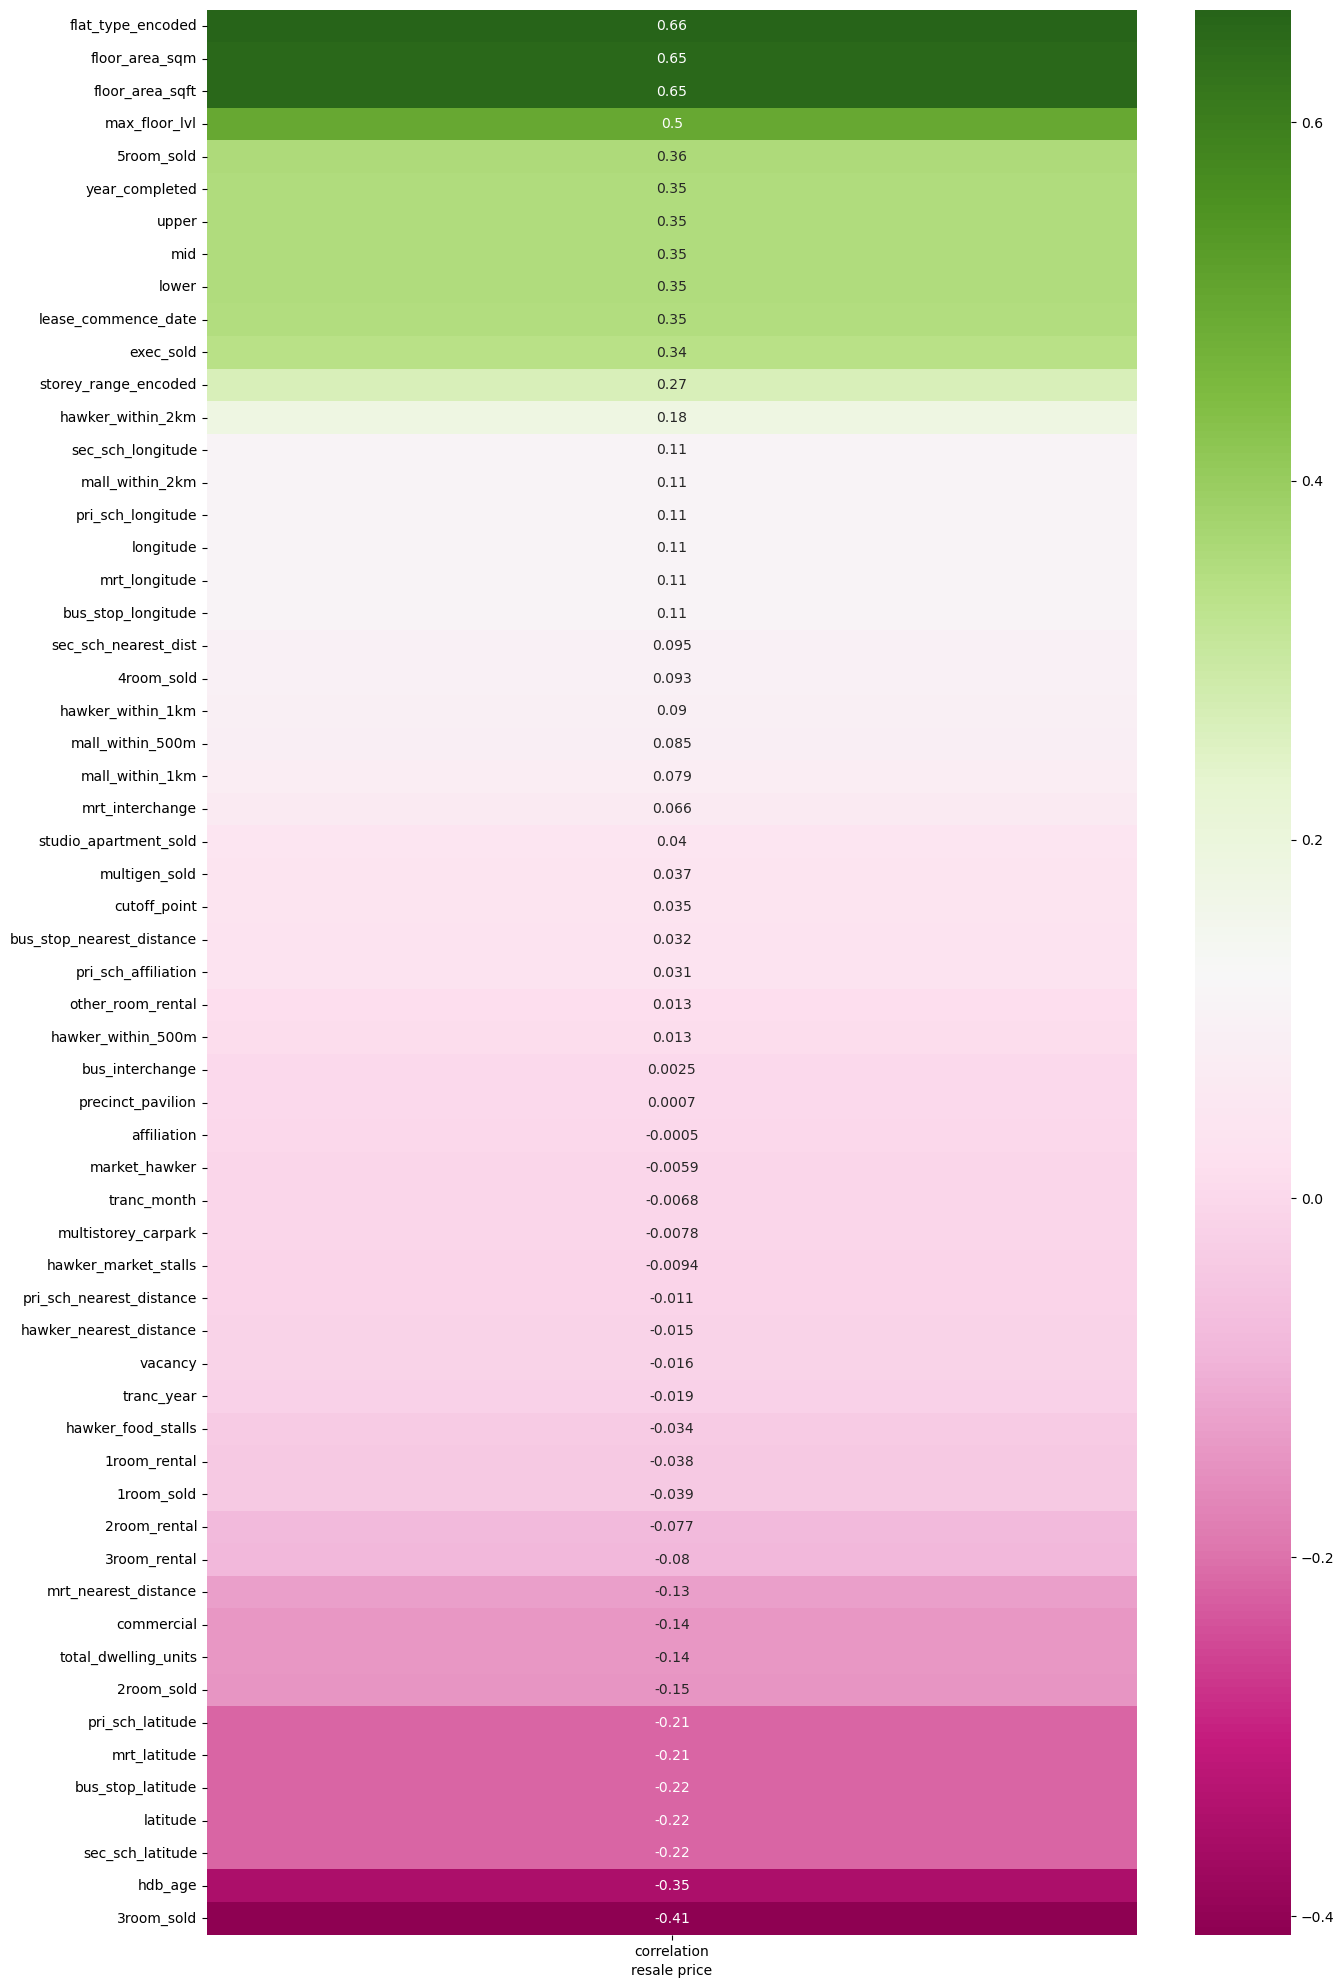

In [27]:
#find the corr with "resale_price"
corr = round(hdb.corrwith(hdb["resale_price"]).sort_values(ascending=False),4).drop(["resale_price", "id"])

#heatmap
corr_df = pd.DataFrame(corr).rename_axis(columns="resale price").rename(columns={0:"correlation"})
plt.figure(figsize=(15,25))
sns.heatmap(corr_df, annot=True, cmap="PiYG");

Correlation shows that only 5 independent variables have correlation of more than 0.4 absolute value with resale price. Hence, the threshold is adjusted to 0.3 in order to capture more variables and investigate further their relationship.

We can see that the higher the flat size (represent by flat type and floor area) and height (represented by max floor level) , the higher the resale price. Resale price also tend to be higher with new houses (represented by year completed  and lease_commence date in a positive number and hdb age in a negative number).

The variables "upper", "mid", "lower" correlation with resale price is vague as they have similar correlation with resale price. As these variables are the same thing with storey range, we will ignore these variables in our model.

Interestingly, it shows the higher the number of 3-room residential units in the resale flat, the lower the resale price. This can be explained better by comparison with "5room_sold" and "exec_sold", they represent that the more bigger size flats in the resale unit's block, the higher the resale price. This applies to the case for 3room_sold in an opposite way.

{'flat_type_encoded': 0.6625, 'floor_area_sqm': 0.6541, 'floor_area_sqft': 0.6541, 'max_floor_lvl': 0.4956, '5room_sold': 0.3594, 'year_completed': 0.3537, 'upper': 0.3536, 'mid': 0.3532, 'lower': 0.3525, 'lease_commence_date': 0.3503, 'exec_sold': 0.3375, 'hdb_age': -0.3503, '3room_sold': -0.4104}


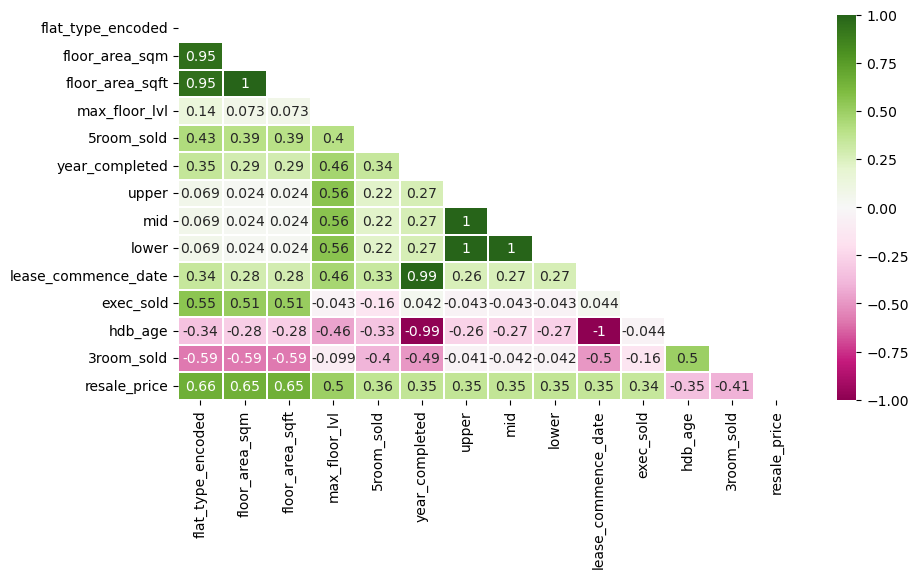

In [28]:
#find variable that has at least 0.30 correlation with "resale_price"

corr_dict = {}
for k,v in corr.iteritems():
    if v>=0.3 or v<=-0.3:
        corr_dict[k] = v

# heatmap with corr above 0.3 or below -0.3
plt.figure(figsize=(10,5))
corr_above_30 = hdb[[k for k,v in corr_dict.items()]]
corr_above_30 = corr_above_30.join([hdb["resale_price"]])
mask = np.triu(np.ones_like(corr_above_30.corr(), dtype='bool'))
sns.heatmap(corr_above_30.corr(), vmax=1, vmin=-1, cmap="PiYG", annot=True, mask=mask, linewidths=0.1);

print(corr_dict)

However, floor_area_sqm and floor_area_sqft are raising multicollinearity problem (represent in dark green) because they both have equally strong correlation with resale price. Hence, only floor_area_sqm is used in this model. Although floor_area_sqm is highly correlated with flat_type_encoded, both are still included in the model because floor_area_sqm is continuos variable, it could be more accurate in terms of modelling prediction.

Similarly, year_completed, lease_commence_date and hdb_age are highly correlated (represented by maroon color). Therefore, hdb age is included in the model only.

Note: As the correlation with categorical variables cannot be captured in the heatmap, further analysis on categorical variables will be performed below. 

In [29]:
#Feature included so far:

x = ["flat_type_encoded", "floor_area_sqm", "hdb_age", "max_floor_lvl", "3room_sold", "5room_sold", "exec_sold"]

##### Continuos Variables:Histogram

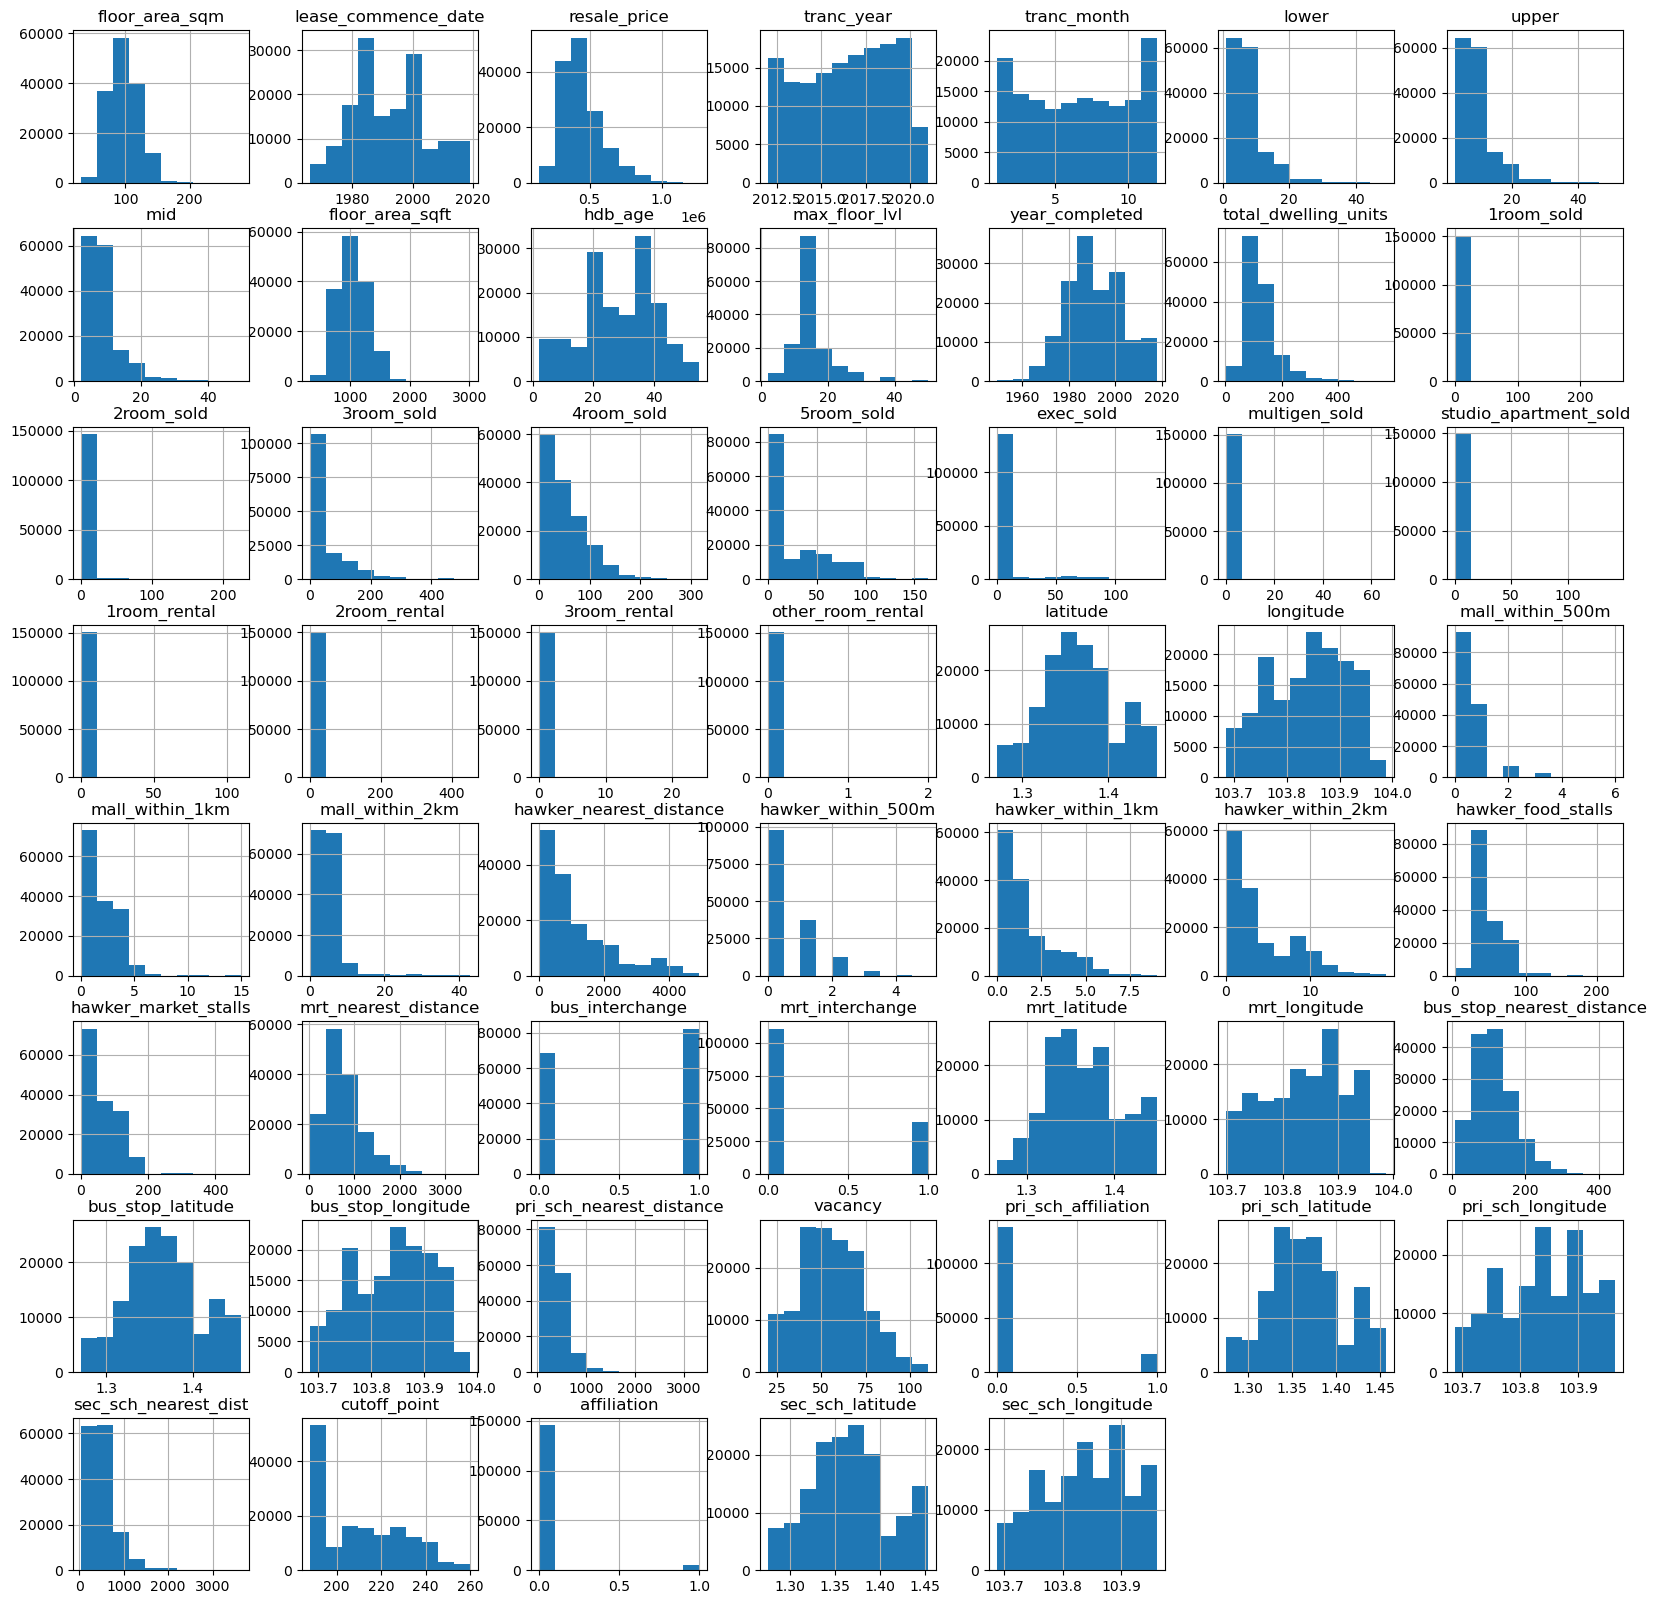

In [30]:
#histogram for all continuos x variables and the y variable

hdb[continuos_features].drop(columns="id").hist(figsize=(20, 20));

From the histograms we can observe that:

1) Most of the resale flat are sold at 100sgd per sqm or 1000sgd per sqft.

2) The dependent/target variable (resale price) has a distribution slightly skewed to the right with mean price $449k. That means some of the resale flat are sold at extremely high price. 

3) The transaction volume was increasing until 2020, followed by a sudden drop. Also, it is found that buyers tend to transact in Dec and Jan comparing to other months.

4) The range of storey of the resale flat sold is 1-13 storey. This could be the reason that the max floor of a HDB block is usually in range of 12-16 storeys.  

5) Among the resale flat sold, most are aged 20 and 35. Decreasing transaction volume happened once the hdb age exceeded 35.

6) Resale flat typically has 100-180 unit in the block.

7) Most resale flat do not have 1room, 2 room, executive, multi-generation, studio apartment types in the same block. The most common room type is 4 room, following by 5 room and 3 room. Also, usually the resale flat does not have any rental unit in the same block.

8) Half of the resale flats do not have any mall within 2km. The other half usually can see 2-8 malls in 2km (among this, one-third of them can at least see 1 mall within 500m). 

9) Only one-third of the resale flat has 1-2 hawker centre within 500m. Most of them are able to see at least 1 hawker within 1km with around 40 food stalls in it, but without market stalls.

10) Most of the HDB sold are nearer to bus-interchange, comparing to train-interchange. While bus stop typically located within 100m.

11) Resale flat usually is 700m from nearest primary school (with vacancy range of 40-65) and secondary school (with most of their cutoff point less than 200).

##### Continuos Variables: Pairplot

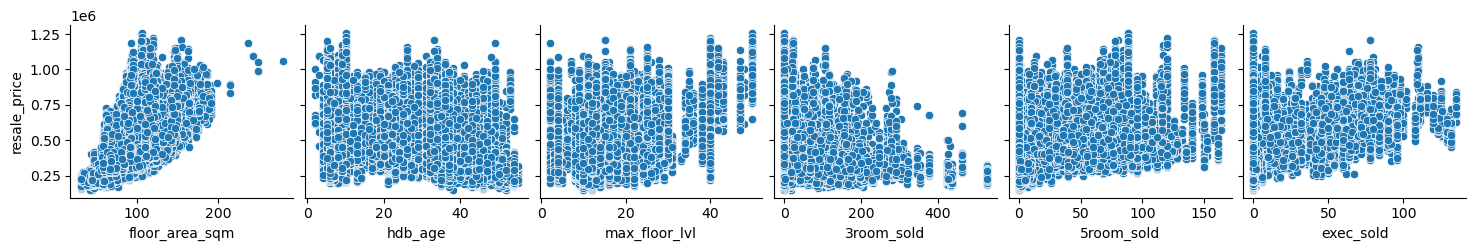

In [31]:
#pairplot for selected x variables

sns.pairplot(hdb, x_vars=['floor_area_sqm', 'hdb_age','max_floor_lvl',
                          '3room_sold', '5room_sold', 'exec_sold'], y_vars=["resale_price"])

The pairplot shows a strong linear relationship between floor area and resale price. The linearity between max floor level and resale price is not very strong, however, it is still noticeable for level 30 onwards. The number of 3 room unit in the block of the resale flat also reflected a strong negative linear relationship. For 5 room and executive number in the block, the linear relationship is very weak, and is capture at the lower bound of the resale price only. Whereas for hdb age plot, there is no clear relationship shown, it could be due to the scale of the pairplot. We will examine using boxplot below.

##### Continuos Variables: Boxplot and Countplot

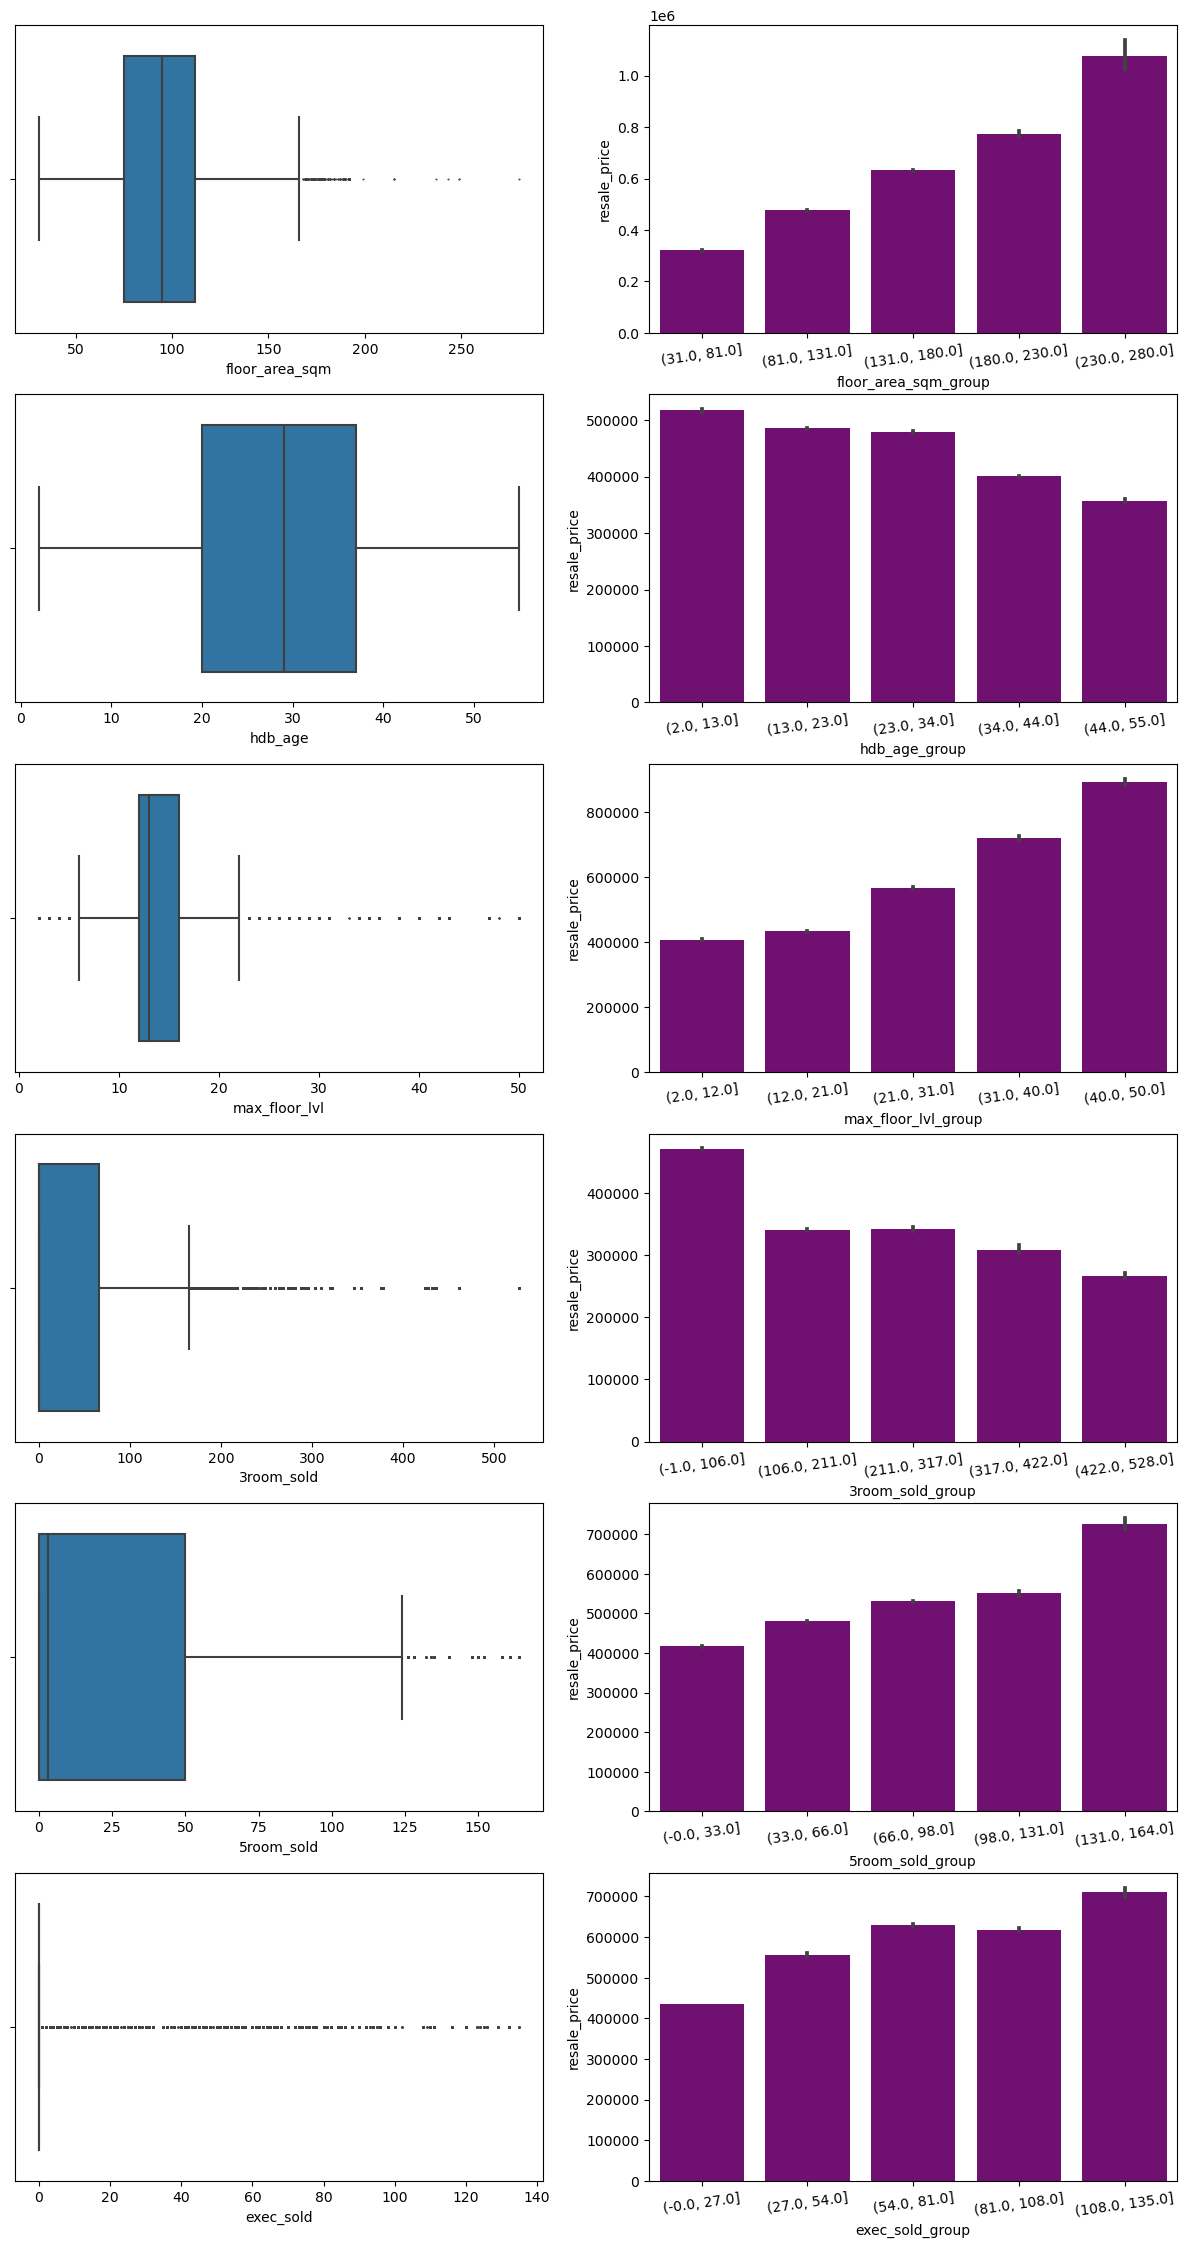

In [32]:
# boxplot for y variable and highly correlated variable

def subplots_boxplot(list_):
    nrows = int(np.ceil(len(list_)))
    fig,ax = plt.subplots(nrows=nrows, ncols=2, squeeze=True, figsize=(15,28))
    ax = ax.ravel()
    
    for i, j in enumerate(list_):
        my_order = hdb.groupby(j)["resale_price"].median().iloc[::1].index       #find the order    
        chart = sns.boxplot(data=hdb, x=j, ax=ax[2*i], fliersize=0.5, order=my_order)
        hdb[j+"_group"] = pd.cut(x=hdb[j], bins=5, duplicates="drop", precision=0)
        chart = sns.barplot(data=hdb, x=hdb[j+"_group"], y="resale_price", ax=ax[2*i+1], color="purple") 
        chart.set_xticklabels(chart.get_xticklabels(), rotation=8)
        
subplots_boxplot(['floor_area_sqm','hdb_age', 'max_floor_lvl', '3room_sold', '5room_sold', 'exec_sold'])

While the scatter plot shows no obvious linearity with hdb age, the bar plot reflected a slight different in resale price. Hence it will still be included in the model.

The boxplot shows the floor area and maximum floor level is slightly skewed to the right, whereas the number of 3rooms and 5 rooms in the unit of resale flat is severely skewed. Due to limited data in exec_sold, this variable will be removed from modelling as it will significantly affect the prediction power.

Considerable number of outliers appeared in the resale price and number of 3rooms in the unit of resale flat. Skewness and outlier could make the model less predictable. Hence, data scaling will be performed in the later stage.

In [33]:
# remove variable "exec_sold"

x.remove("exec_sold")

##### Target Variables: Lineplot

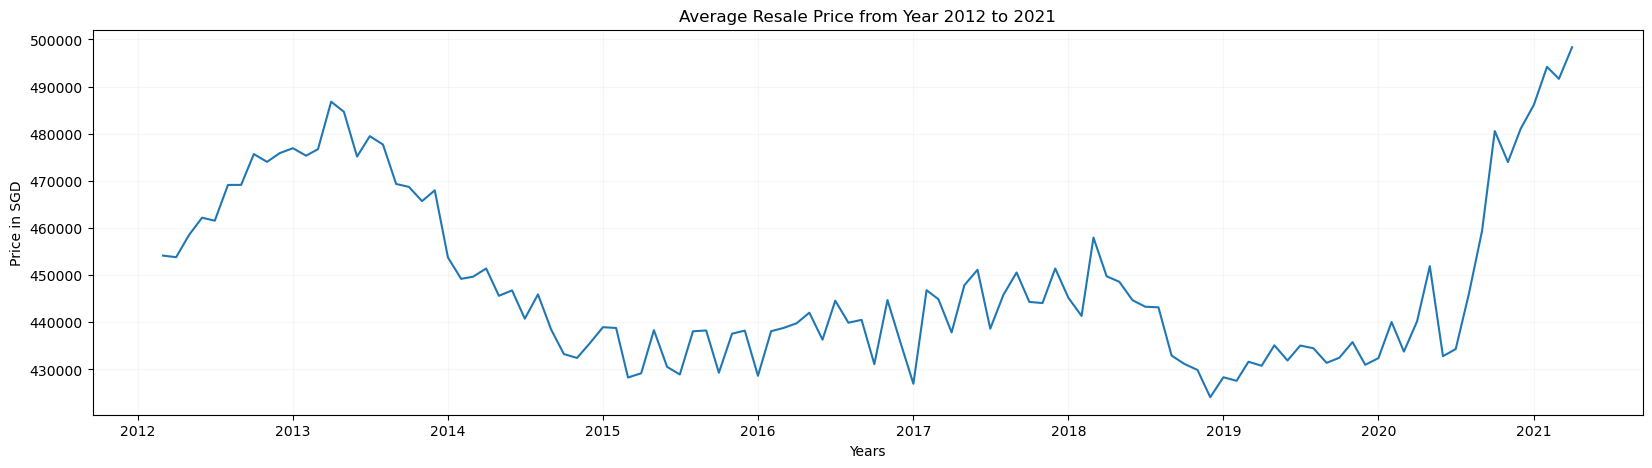

In [34]:
# target variable resale price over years

mean_resale_price= hdb.groupby("tranc_yearmonth")["resale_price"].mean()
plt.figure(figsize=(20,5))
plt.plot(mean_resale_price, data=hdb)
plt.title("Average Resale Price from Year 2012 to 2021")
plt.xlabel("Years")
plt.ylabel("Price in SGD")
plt.grid(alpha=0.1);

Resale price was fluctuated in the range of $430k to 490k, but recently seem a significant increasing trend that breakout the resistance in previous 10 years.

<AxesSubplot:>

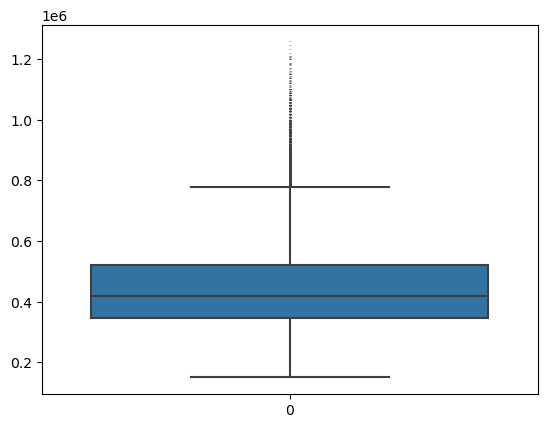

In [35]:
sns.boxplot(data = hdb['resale_price'], fliersize=0.1)

Target variable is right skewed and has noticeble outliers.

##### Ordinal Variables: Boxplot and Countplot

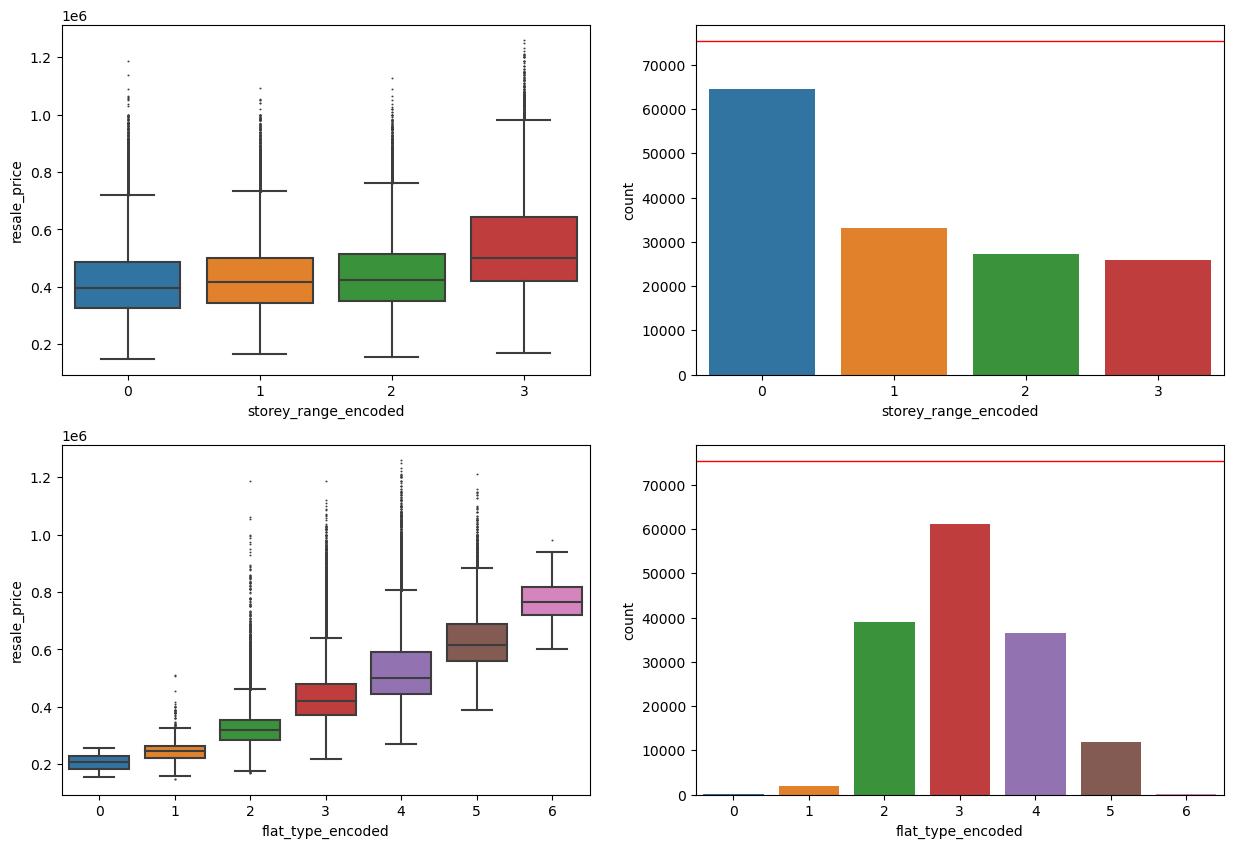

In [36]:
# boxplot for ordinary variable to see their relationship with resale price

def subplots_boxplot(list_, x_rotation=False):
    nrows = int(np.ceil(len(list_)))
    fig,ax = plt.subplots(nrows=nrows, ncols=2, squeeze=True, figsize=(15,10))
    ax = ax.ravel()
    
    for i, j in enumerate(list_):
        my_order = hdb.groupby(j)["resale_price"].median().iloc[::1].index       #find the order    
        chart = sns.boxplot(data=hdb, y="resale_price", x=j, ax=ax[2*i], fliersize=0.5, order=my_order)
        if x_rotation == True:
            chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        chart = sns.countplot(data=hdb, x=j, ax=ax[2*i+1], order=my_order) 
        if x_rotation == True:
            chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
        ax[2*i+1].axhline(len(hdb)*0.5, color="r", label="threshold", linewidth=1)
        
subplots_boxplot(ordinal_features)

Storey range of separate groups (storey 1-4, 5-7, 8-10, 11-49) appeared to have different correlation with resale price. It is observed that the highest group has highest mean resale price. Hence, it is included in the model.

It is already clear that flat type has a strong correlation with resale price in heatmap. 

There are also noticeable outliers present in both the variables.

In [37]:
#add x variable into model list

x.append("storey_range_encoded")
x

['flat_type_encoded',
 'floor_area_sqm',
 'hdb_age',
 'max_floor_lvl',
 '3room_sold',
 '5room_sold',
 'storey_range_encoded']

##### Boolean Variables: Boxplot and Countplot

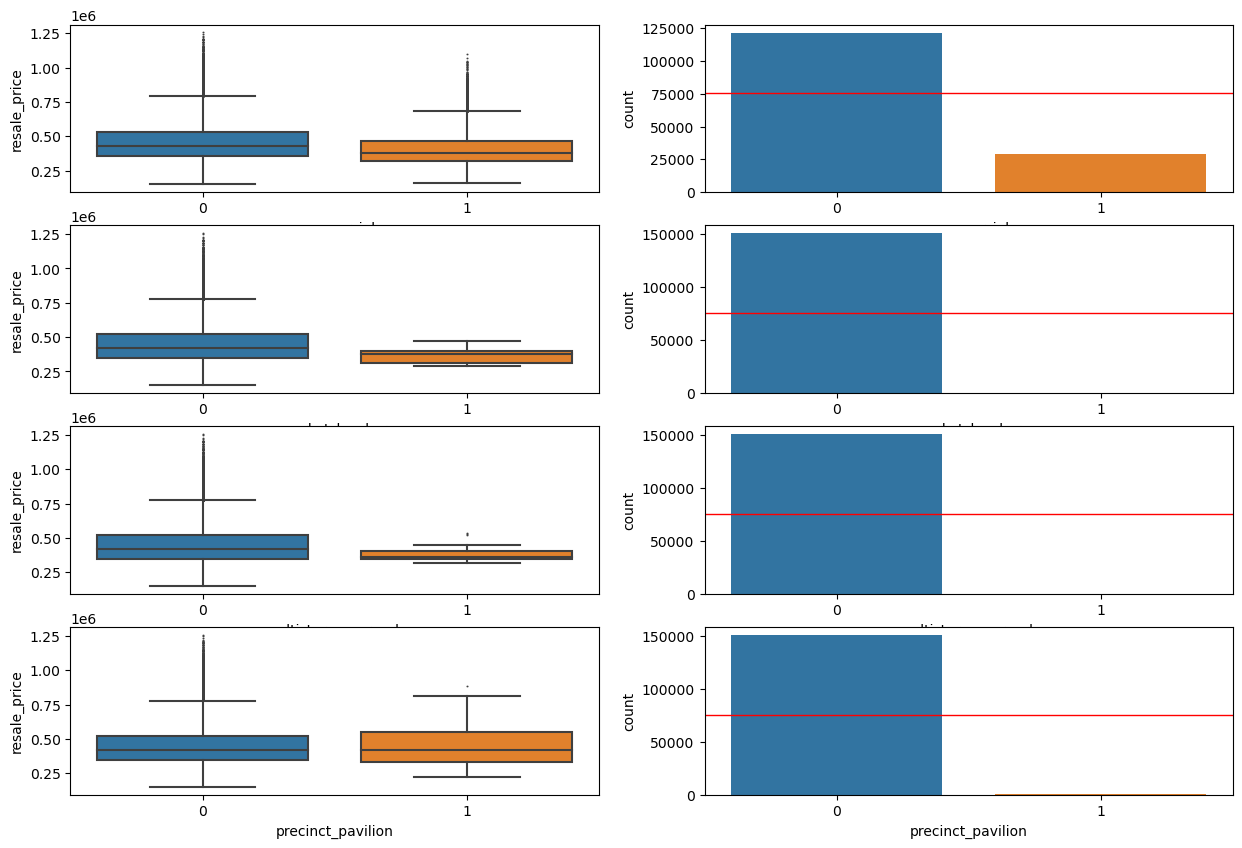

In [38]:
# boxplot for boolean variable to see their relationship with resale price

subplots_boxplot(boolean_features)

All of the boolean variables are meaningless to be included into the model as their correlation with resale price cant be differentiated. Besides, the group of 0 and 1 in each variable is severely disproportionate. Hence, they are not excluded.

##### Nominal Variables to be examined:

In [39]:
nominal_features

['town',
 'flat_model',
 'planning_area',
 'mrt_name',
 'pri_sch_name',
 'sec_sch_name']

##### Nominal Variables: Barplot and boxplot- Secondary School Name (sec_sch_name)

Assuming cut off point is the proxy of popularity of secondary school: the higher the cut off point, the more popular the school is, the higher the resale price. Top 20 and bottom 20 secondary schools are selected based on the cut off point to compare their mean resale values to investigate their correlation with resale price.

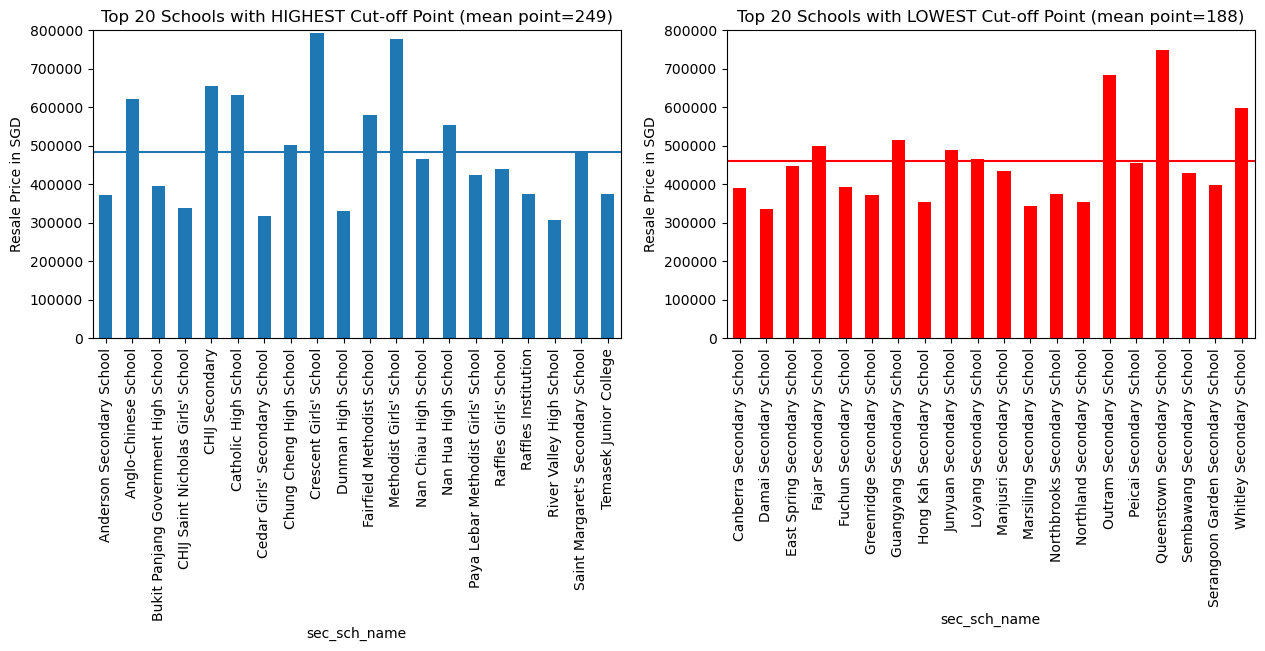

In [40]:
# bar plot for top 20 and bottom 20 secondary schools and resale price

plt.figure(figsize=(15,4))
plt.subplot(121)
top20_sec = hdb.groupby("sec_sch_name")[["cutoff_point"]].mean().sort_values(by="cutoff_point",ascending=False).reset_index().head(20)
top20_sec = hdb[hdb["sec_sch_name"].isin(top20_sec["sec_sch_name"])]
top20_sec.groupby("sec_sch_name")["resale_price"].median().plot(kind="bar", ylim=(0,800000))
plt.hlines(y=top20_sec["resale_price"].mean(), xmin=-10, xmax=20)
plt.title("Top 20 Schools with HIGHEST Cut-off Point (mean point=249)")
plt.ylabel("Resale Price in SGD");

plt.subplot(122)
bottom20_sec = hdb.groupby("sec_sch_name")[["cutoff_point"]].mean().sort_values(by="cutoff_point",ascending=True).reset_index().head(20)
bottom20_sec = hdb[hdb["sec_sch_name"].isin(bottom20_sec["sec_sch_name"])]
bottom20_sec.groupby("sec_sch_name")["resale_price"].median().plot(kind="bar", color="r", ylim=(0,800000))
plt.hlines(y=bottom20_sec["resale_price"].mean(), xmin=-10, xmax=20 ,colors="r")
plt.title("Top 20 Schools with LOWEST Cut-off Point (mean point=188)")
plt.ylabel("Resale Price in SGD");


In [41]:
print(f'The median resale price for top 20 sec sch: ${round(top20_sec["resale_price"].median())}')
print(f'The median resale price for bottom 20 sec sch: ${round(bottom20_sec["resale_price"].median())}')

The median resale price for top 20 sec sch: $440000
The median resale price for bottom 20 sec sch: $422000


The median difference in resale price is too small. Bar plot above shows that nearest secondary school does not have obvious correlation with the resale price. This is better presented in the boxplot below, showing the direct relationship between cut off point and resale price.

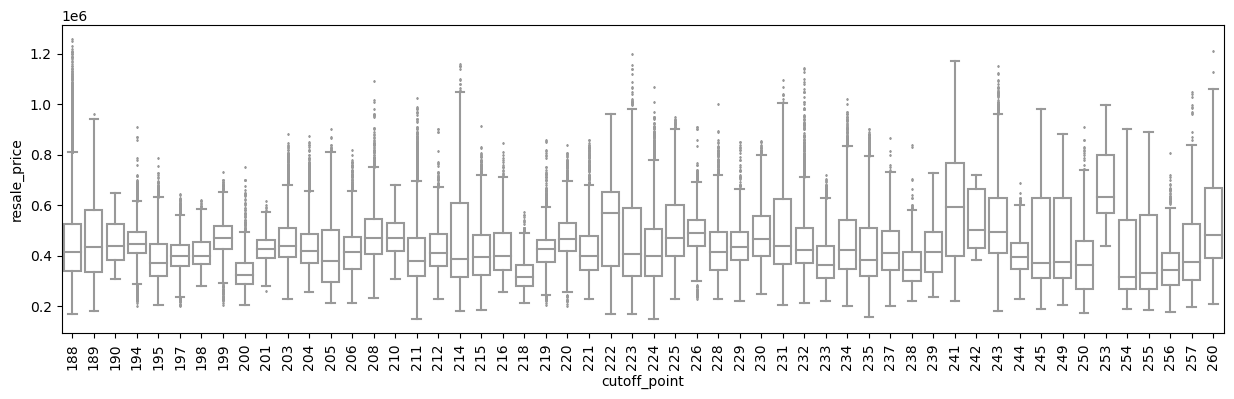

In [42]:
plt.figure(figsize=(15,4))
chart = sns.boxplot(data=hdb, x="cutoff_point", y="resale_price", fliersize=1 ,color="white")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Therefore, secondary school is not included in the model.

##### Nominal Variable : Barplot and Boxplot - Primary School Name (pri_sch_name)

Similarly, assuming vacancy is the proxy of popularity of primary school: the lower the number of vacancies, the higher the popularity, the higher the resale price. Top 20 and bottom 20 primary schools are selected based on the number of vacancies to compare their mean resale values to investigate their correlation with resale price.

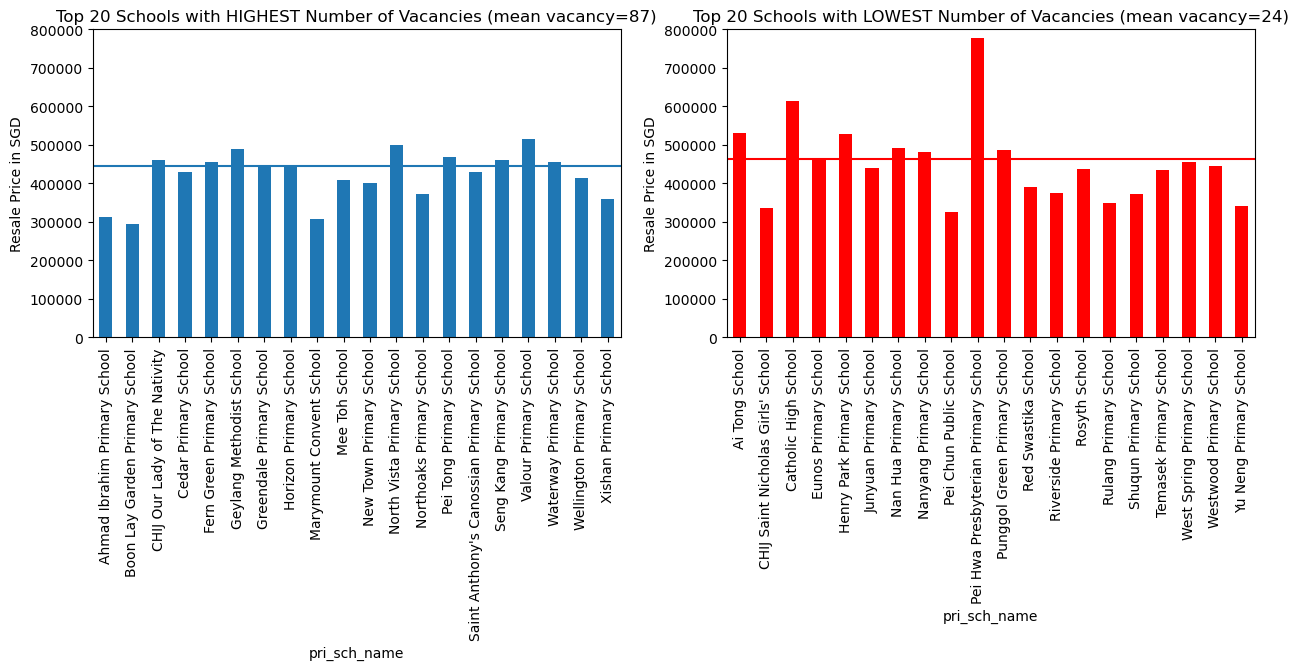

In [43]:
# bar plot for top 20 and bottom 20 primary schools and resale price

plt.figure(figsize=(15,4))
plt.subplot(121)
top20_pri = hdb.groupby("pri_sch_name")[["vacancy"]].mean().sort_values(by="vacancy",ascending=False).reset_index().head(20)
top20_pri = hdb[hdb["pri_sch_name"].isin(top20_pri["pri_sch_name"])]
top20_pri.groupby("pri_sch_name")["resale_price"].median().plot(kind="bar", ylim=(0,800000))
plt.hlines(y=top20_pri["resale_price"].mean(), xmin=-10, xmax=20)
plt.title("Top 20 Schools with HIGHEST Number of Vacancies (mean vacancy=87)")
plt.ylabel("Resale Price in SGD");

plt.subplot(122)
bottom20_pri = hdb.groupby("pri_sch_name")[["vacancy"]].mean().sort_values(by="vacancy",ascending=True).reset_index().head(20)
bottom20_pri = hdb[hdb["pri_sch_name"].isin(bottom20_pri["pri_sch_name"])]
bottom20_pri.groupby("pri_sch_name")["resale_price"].median().plot(kind="bar", color="r", ylim=(0,800000))
plt.hlines(y=bottom20_pri["resale_price"].mean(), xmin=-10, xmax=20 ,colors="r")
plt.title("Top 20 Schools with LOWEST Number of Vacancies (mean vacancy=24)")
plt.ylabel("Resale Price in SGD");

In [44]:
print(f'The median resale price for top 20 pri sch: ${round(top20_pri["resale_price"].median())}')
print(f'The median resale price for bottom 20 pri sch: ${round(bottom20_pri["resale_price"].median())}')

The median resale price for top 20 pri sch: $428000
The median resale price for bottom 20 pri sch: $430000


Similarly, the median difference in resale price is insufficient for variable "pri_sch_name" to be included in the model. Bar plot does not indicate any significant correlation between primary school and resale price. A boxplot is presented below for direct observation of their relationship.

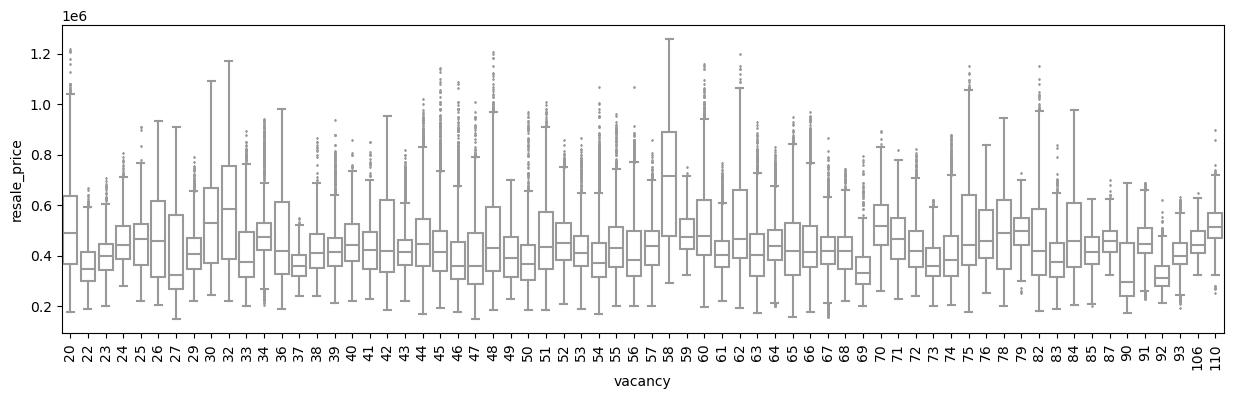

In [45]:
plt.figure(figsize=(15,4))
chart = sns.boxplot(data=hdb, x="vacancy", y="resale_price", fliersize=1 ,color="white")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

Hence, primary school is not taken into consideration for modelling.

##### Nominal Variable: Boxplot and Countplot - Town & Planning Area

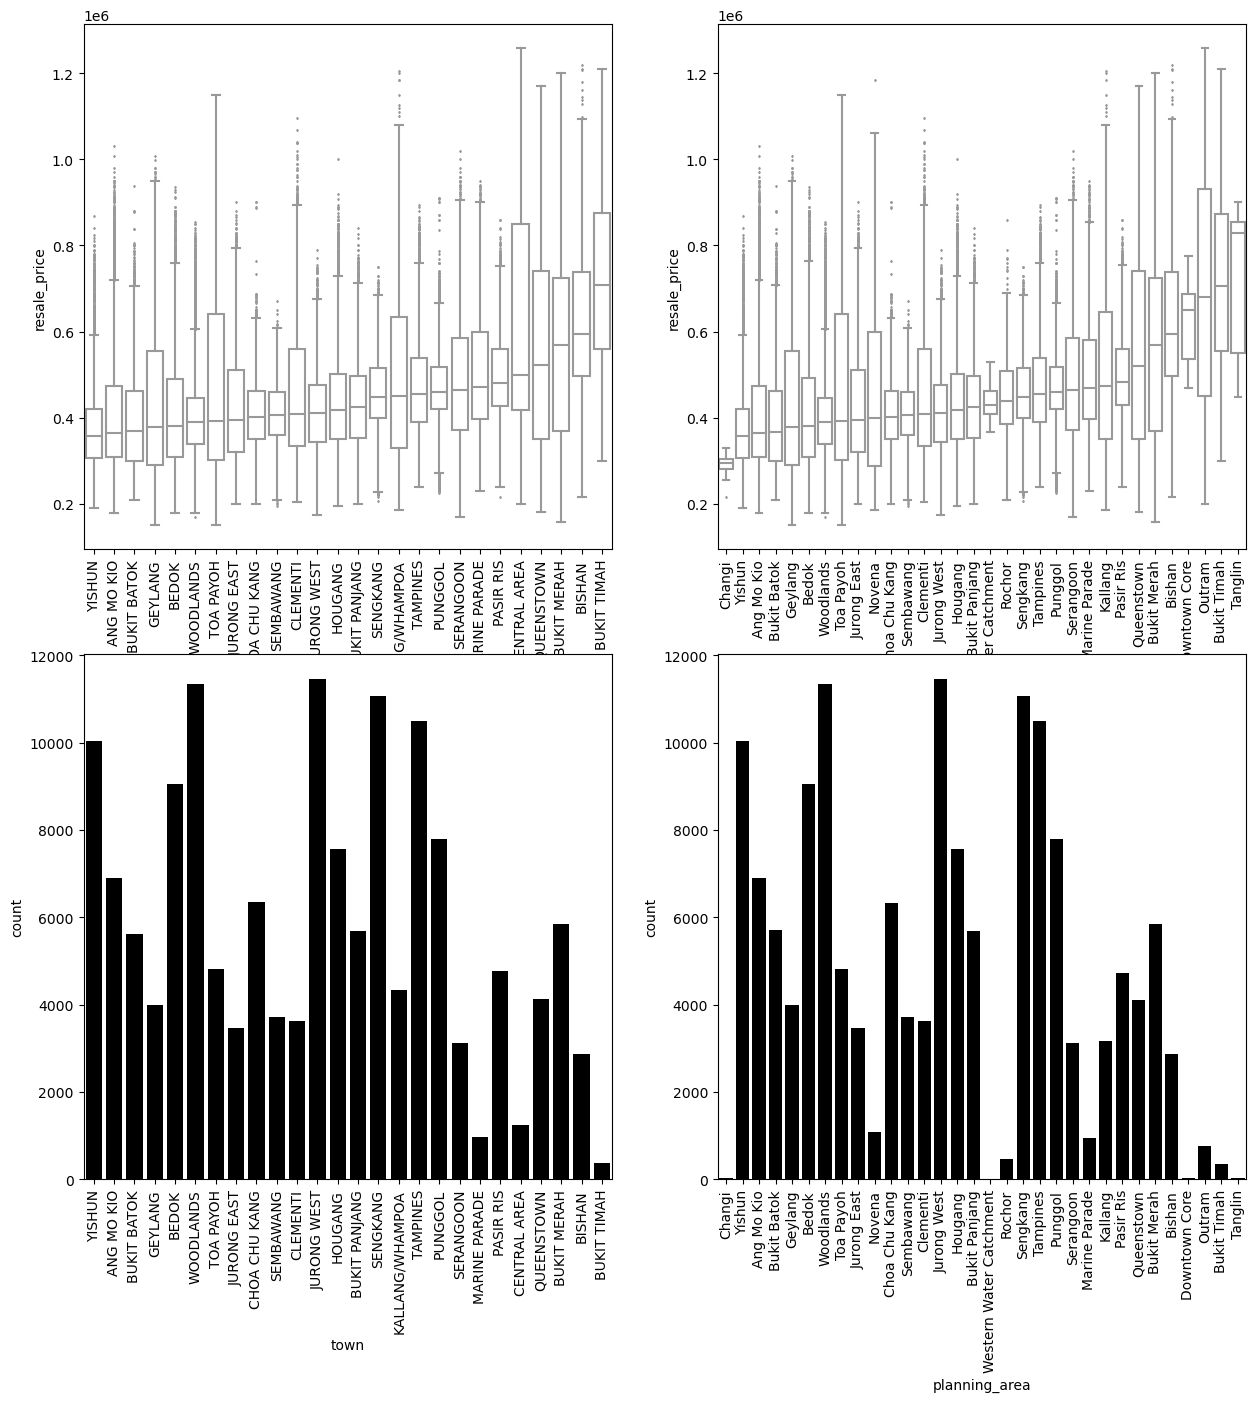

In [46]:
#boxplot for town and planning area

fig,ax = plt.subplots(nrows=2, ncols=2, squeeze=True, figsize=(15,15))
ax = ax.ravel()
    
# plt.figure(figsize=(20,19))
# plt.subplot(211)
my_order = hdb.groupby("town")["resale_price"].median().sort_values().index
chart = sns.boxplot(data=hdb, x="town", y="resale_price", fliersize=1 ,color="white", ax=ax[0], order=my_order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart = sns.countplot(data=hdb, x="town", ax=ax[2], order=my_order, color="black")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# plt.subplot(212)
my_order = hdb.groupby("planning_area")["resale_price"].median().sort_values().index
chart = sns.boxplot(data=hdb, x="planning_area", y="resale_price", fliersize=1 ,color="white", ax=ax[1], order=my_order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart = sns.countplot(data=hdb, x="planning_area", ax=ax[3], order=my_order, color="black")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

The difference between town and planning area is the region included. Some towns have subdivided into different planning area (as displayed below). Hence, town and planning area should not be included in the model together, as they will create  multicollinearity problem. In this model, planning area will be included instead of town is because the boxplot shows the median difference between planning area is larger than mean difference between town.

In [47]:
#difference between town and planning area

hdb.groupby("town")["planning_area"].unique()

town
ANG MO KIO                                          [Ang Mo Kio]
BEDOK                                                    [Bedok]
BISHAN                                                  [Bishan]
BUKIT BATOK                                        [Bukit Batok]
BUKIT MERAH                                        [Bukit Merah]
BUKIT PANJANG                                    [Bukit Panjang]
BUKIT TIMAH                               [Bukit Timah, Tanglin]
CENTRAL AREA                     [Rochor, Outram, Downtown Core]
CHOA CHU KANG           [Choa Chu Kang, Western Water Catchment]
CLEMENTI                                              [Clementi]
GEYLANG                                                [Geylang]
HOUGANG                                                [Hougang]
JURONG EAST                                        [Jurong East]
JURONG WEST                                        [Jurong West]
KALLANG/WHAMPOA    [Kallang, Novena, Bukit Batok, Downtown Core]
MARINE PARADE       

In [48]:
# add variable into x

x.append("planning_area")
x

['flat_type_encoded',
 'floor_area_sqm',
 'hdb_age',
 'max_floor_lvl',
 '3room_sold',
 '5room_sold',
 'storey_range_encoded',
 'planning_area']

##### Nominal Variable: Boxplot and Countplot - Flat Model (flat_model)

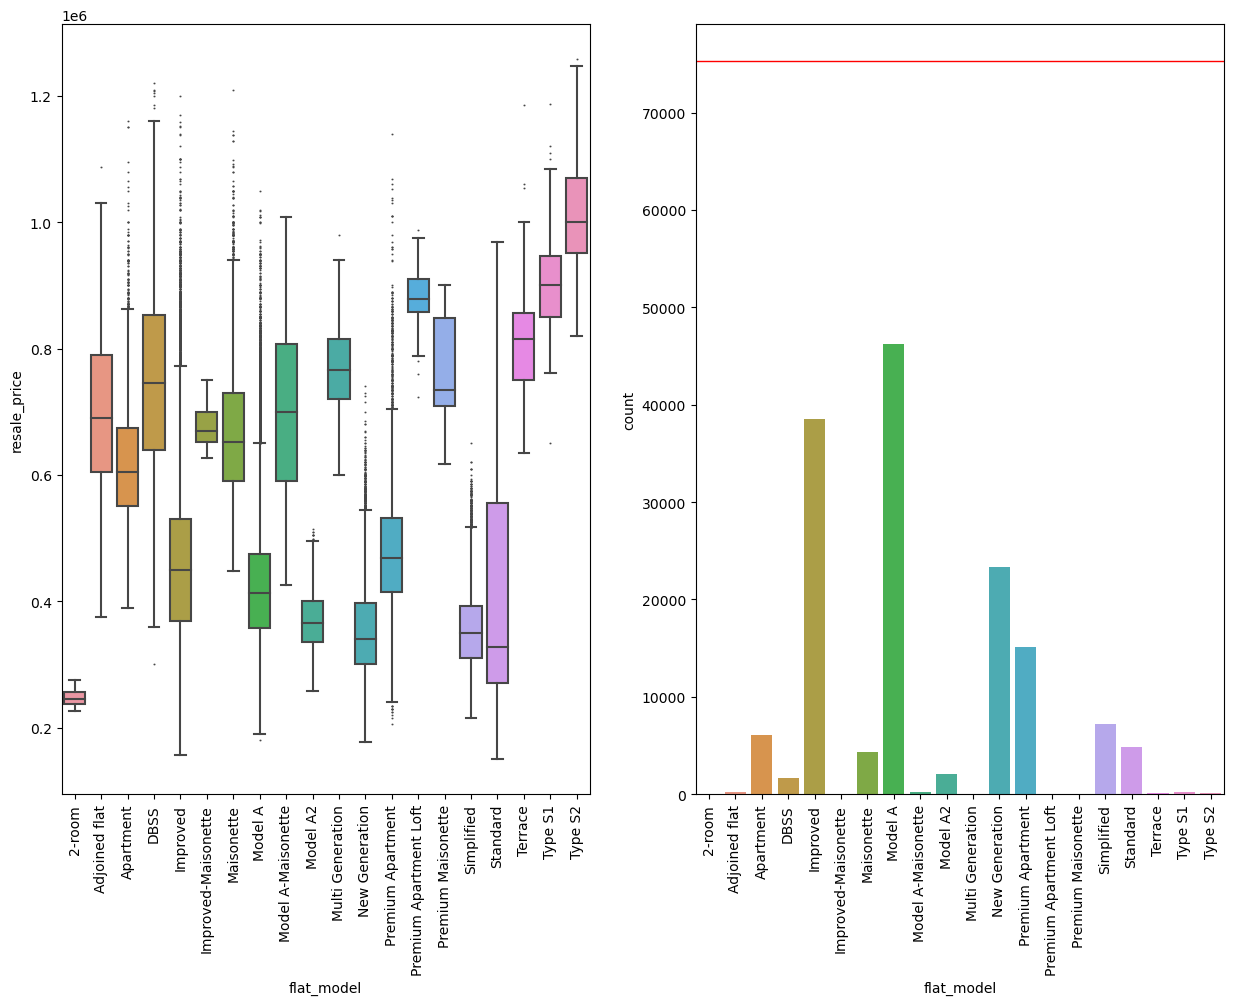

In [49]:
subplots_boxplot(["flat_model"], x_rotation=True)

As seen from the boxplot, most of the groups are differentiable with different range of resale price. Therefore, flat_model will also be included in this model. However, count blot shows the proportion of each groups differ significantly. Substantial amount of outliers present.

In [50]:
x.append("flat_model")
x

['flat_type_encoded',
 'floor_area_sqm',
 'hdb_age',
 'max_floor_lvl',
 '3room_sold',
 '5room_sold',
 'storey_range_encoded',
 'planning_area',
 'flat_model']

##### Nominal Variable: boxplot - MRT name

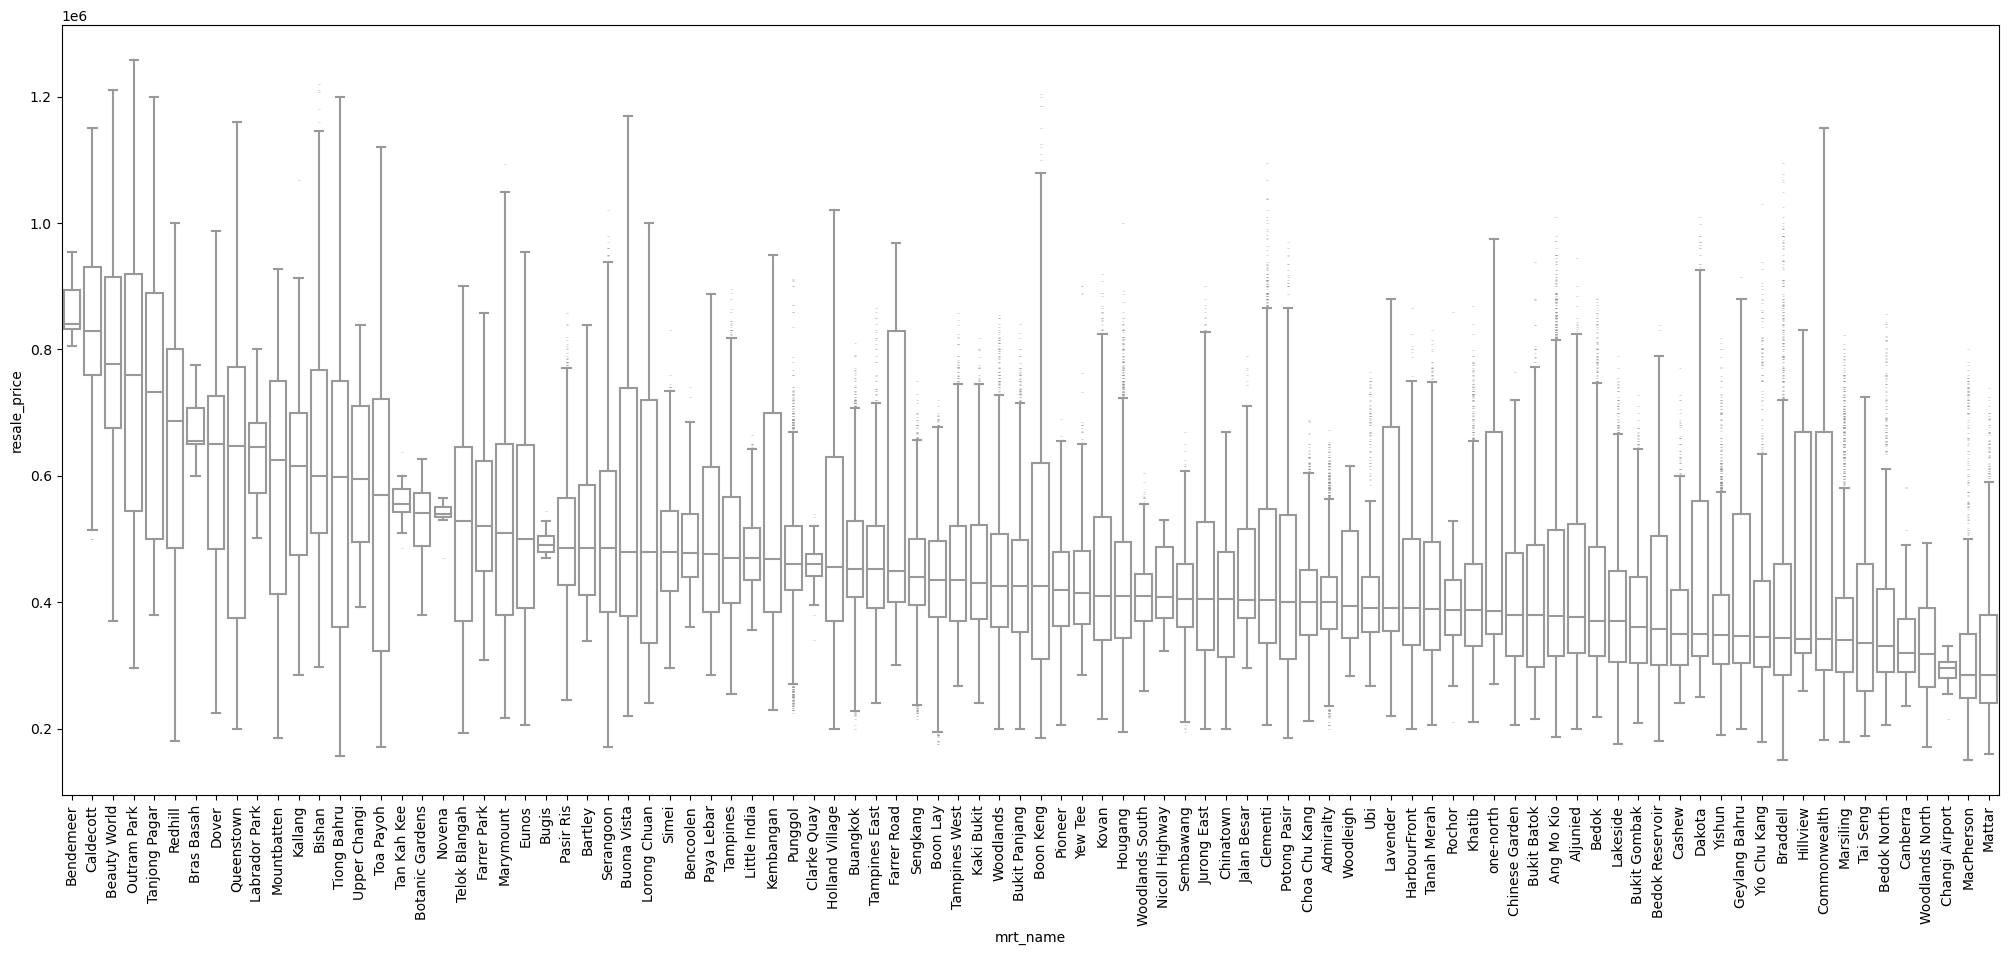

In [51]:
plt.figure(figsize=(25,10))
my_order = hdb.groupby("mrt_name")["resale_price"].median().sort_values(ascending= False).index
chart = sns.boxplot(x="mrt_name", y="resale_price", data=hdb, fliersize=.1, color="white", order=my_order)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

The boxplot shows that resale price varies depending on the nearest mrt to the resale flat. Therefore, it will be included in the model.

In [52]:
# x variables to be included in first attempt of modeling
x.append("mrt_name")
x

['flat_type_encoded',
 'floor_area_sqm',
 'hdb_age',
 'max_floor_lvl',
 '3room_sold',
 '5room_sold',
 'storey_range_encoded',
 'planning_area',
 'flat_model',
 'mrt_name']

In [53]:
# hdb.to_csv("../data/hdb_cleaned.csv")

# REFER PART 2 FOR MODELING

##### PLEASE IGNORE THE BELOW PART

if cross val score between train and test is not differ significantly, the dataset is randomly selected. If alot, then might need to adjust random seed

Multicollinearity is an issue for linear regression as it can reduce the accuracy of the coefficient. Hence, we should eliminate it. To determine the issue, Variance Inflation Factor (VIF) can help to identify the correlation between independent variables. However, it is obvious in this case that we can observe from the heatmap directly.

In [54]:
# nominal_df = hdb[nominal_features]
# count_ec = ce.CountEncoder()
# transformer = count_ec.fit_transform(nominal_df)
# nominal_df = nominal_df.join(transformer.add_suffix("_count"))
# nominal_df.head()